#### 图像梯度-sobel算子
![avatar](./images/SOBEL.jpg)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 原始图像
img = cv2.imread('images/sobel_test.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

*dst=cv2.Sobel(src,ddepth,dx,dy,ksize)*
 - ddepth:图像的深度，一般取-1
 - dx和dy分别表示水平方向和竖直方向
 - ksize是Sobel算子的大小

In [3]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
# 原始图像
cv_show(img,'img')

In [5]:
sobelx = cv2.Sobel(img,-1,1,0,ksize=3)
cv_show(sobelx,'sobelx')

 *白到黑是正数，但是黑到白就是负数了，所有的负数都会被阶段为0，所以要取绝对值*

In [6]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx,'sobelx')

In [7]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
cv_show(sobely,'sobely')

*分别计算x和y，再求和*

In [8]:
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

*不建议直接计算*

In [9]:
sobelxy = cv2.Sobel(img,-1,1,1,ksize=3)
cv_show(sobelxy,'sobelxy')

*换lena演示上述结论*

In [10]:
lena = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(lena,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(lena,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

In [11]:
sobelxy = cv2.Sobel(lena,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv_show(sobelxy,'sobelxy')

*显然 X,Ysobel分别计算再相加效果更好*

#### 图像梯度-Scharr算子
*对边缘更敏感*
![avatar](./images/Scharr.jpg)
#### 图像梯度-Laplacian算子
*采用二阶导数，对一些变换更敏感，但对噪音点也比较敏感*
![avatar](./images/Laplacian.jpg)

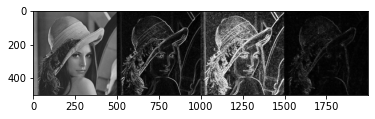

In [12]:
# 不同算子之间的差异
img = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((img,sobelxy,scharrxy,laplacian))
cv_show(res,'res')

plt.imshow(res,'gray')